In [1]:
#%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import time
#import scipy
#import random
import cmath
#import pylops # might not need
import math
#import pyproximal

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist, mnist, cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.saving import register_keras_serializable, deserialize_keras_object
from tensorflow.test import compute_gradient
from tensorflow.compat.v1 import assign_sub
from matplotlib import cm
from matplotlib.colors import Normalize

from scipy.sparse.linalg import LinearOperator
from scipy.fft import fft, ifft, fft2, ifft2
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict

import autosetup 
from backpropagation import CBP, CBP_decoder, CBP_decoder_v2
from complex_optimizer import Complex_SGD, adaptive_stepsize

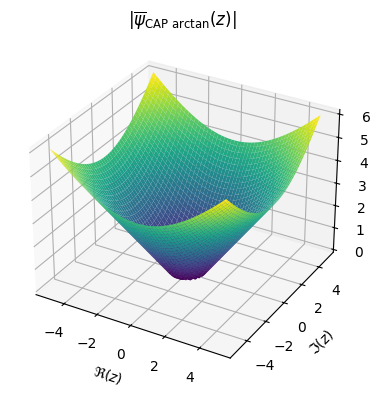

In [22]:
psi = lambda z : autosetup.modrelu(z, b=-1)
#psi = lambda z : autosetup.modrelu(z,b=-0.1)

x = np.linspace(-5, 5, 200)   
y = np.linspace(-5, 5, 200)   
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y                

abs_psi = np.abs(psi(Z))

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, abs_psi, cmap='viridis')

ax.set_xlabel(r'$\Re(z)$')
ax.set_ylabel(r'$\Im(z)$')
ax.set_title(r'$|\overline{\psi}_{\mathrm{CAP\ arctan}}(z)|$')

plt.tight_layout()
plt.show()

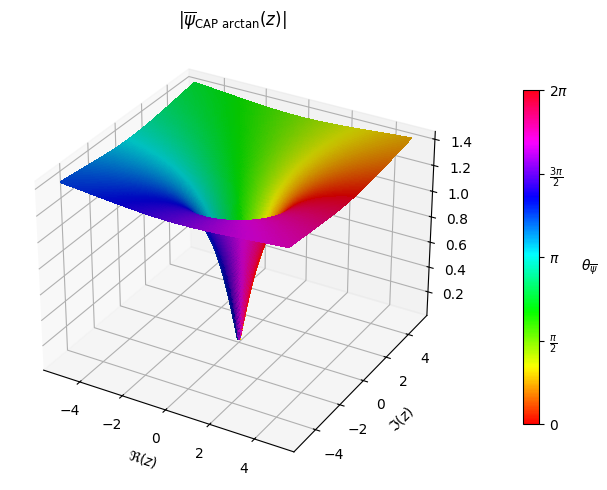

In [3]:
# Complex function
psi = lambda z: autosetup.cap_arctan(z)

# Grid setup
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Evaluate
psi_Z = psi(Z)
abs_psi = np.abs(psi_Z)
arg_psi = np.mod(np.angle(psi_Z), 2*np.pi)

# Argument-based coloring
norm = Normalize(vmin=0, vmax=2*np.pi)
cmap = plt.colormaps['hsv']
colors = cmap(norm(arg_psi))

# Create plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, abs_psi, facecolors=colors, rstride=1, cstride=1, antialiased=False)

# Colorbar for argument
mappable = cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array([])  # Dummy data
cbar = fig.colorbar(mappable, ax=ax, shrink=0.75, pad=0.1)
cbar.set_label(r'$\theta_{\overline{\psi}}$', rotation=0, labelpad=15)
cbar.set_ticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
cbar.set_ticklabels([r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])

# Labels
ax.set_xlabel(r'$\Re(z)$')
ax.set_ylabel(r'$\Im(z)$')
ax.set_title(r'$|\overline{\psi}_{\mathrm{CAP\ arctan}}(z)|$')

plt.tight_layout()
plt.show()


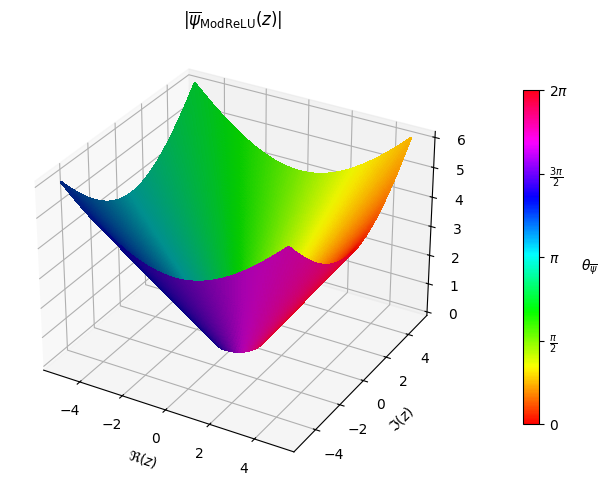

In [6]:
# Complex function
psi = lambda z: autosetup.modrelu(z, b=-1)

# Grid setup
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Evaluate
psi_Z = psi(Z)
abs_psi = np.abs(psi_Z)
arg_psi = np.mod(np.angle(psi_Z), 2*np.pi)

# Argument-based coloring
norm = Normalize(vmin=0, vmax=2*np.pi)
cmap = plt.colormaps['hsv']
colors = cmap(norm(arg_psi))

# Create plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, abs_psi, facecolors=colors, rstride=1, cstride=1, antialiased=False)

# Colorbar for argument
mappable = cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array([])  # Dummy data
cbar = fig.colorbar(mappable, ax=ax, shrink=0.75, pad=0.1)
cbar.set_label(r'$\theta_{\overline{\psi}}$', rotation=0, labelpad=15)
cbar.set_ticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
cbar.set_ticklabels([r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])

# Labels
ax.set_xlabel(r'$\Re(z)$')
ax.set_ylabel(r'$\Im(z)$')
ax.set_title(r'$|\overline{\psi}_{\mathrm{ModReLU}}(z)|$')
#ax.view_init(elev=50, azim=-60)

plt.tight_layout()
plt.show()
